# Let's explore the mushroom edibility database a purely categorical dataset that parametrize mushrooms by their physical properties 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate,ShuffleSplit
from sklearn.linear_model import LogisticRegression

import sys 
sys.path.append("../")


%matplotlib inline

In [2]:
#load the data and display the first 5 rows
rooms=pd.read_csv("../datasets/"+"mushrooms"+".csv")
rooms.head()


,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## What are the categories and what values are they taking

In [3]:
#What are the categories and what features are they taking
feature_list = rooms.columns
for feature_name in feature_list:
    print(feature_name)
    print(rooms[feature_name].unique())
   

edibility
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


### Check if there are any null entries

In [4]:

rooms.isnull().sum()
print(rooms.columns)

Index(['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


### Is the dataset balanced for the edibility feature?


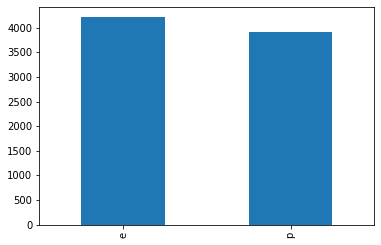

In [5]:
#How many edibles samples and not edibles samples do we have
rooms.edibility.value_counts(normalize=False).plot(kind='bar')


### Partition by edibility how common are the other features

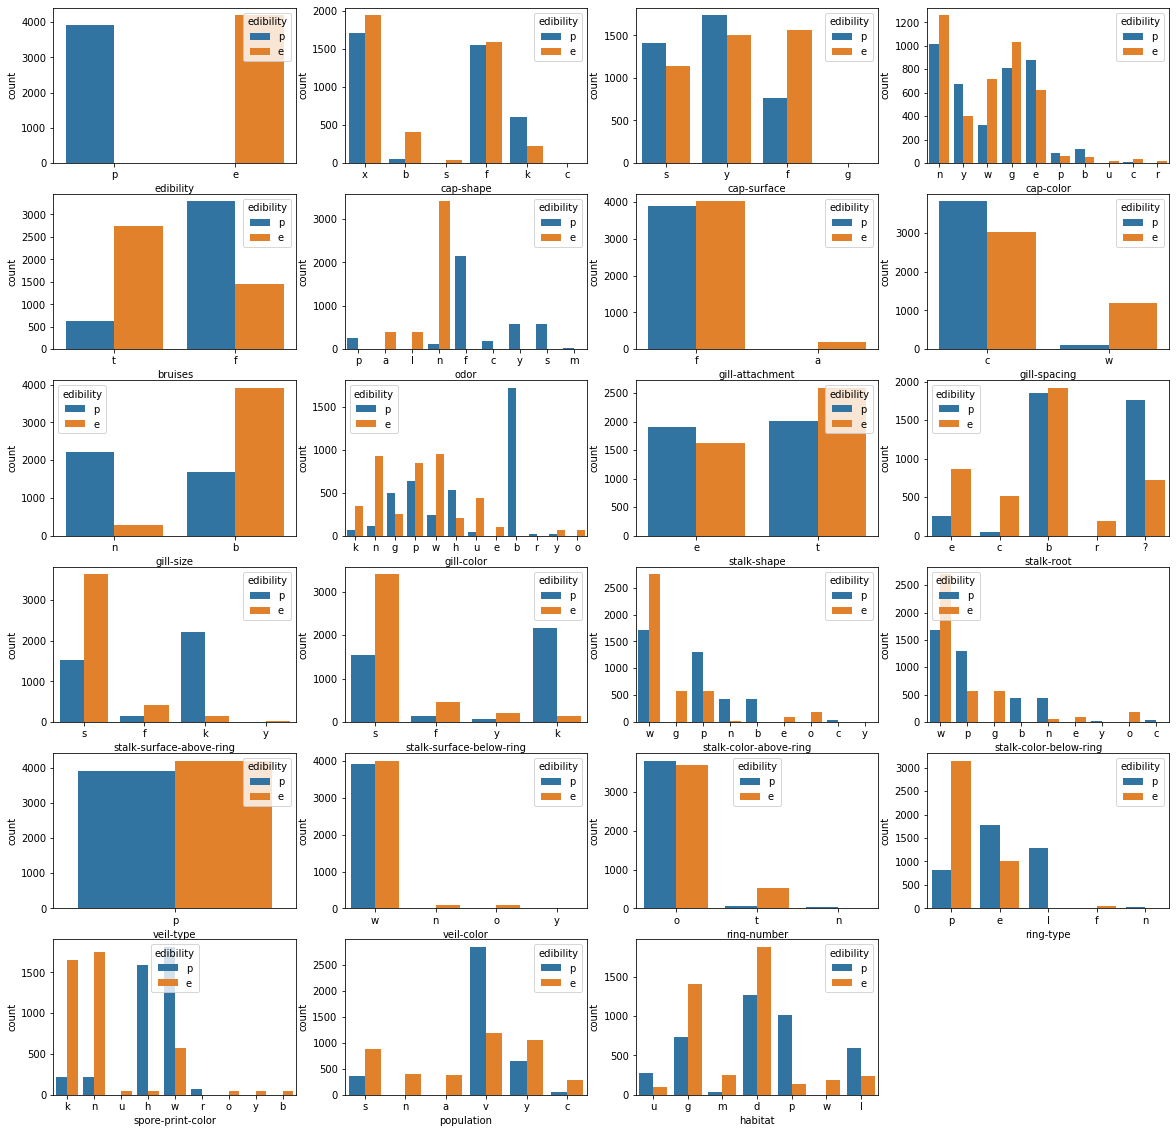

In [6]:
 

fig, axs = plt.subplots(6,4,figsize=(20, 20))
features= rooms.columns
for i in range(0,6):
    for j in range(0,4):
        if( i*4 + j >= len(features)):
            axs[i][j].set_axis_off()   #do not display axis if we are over the max number of features
        else:
            s = sns.countplot(x = features[i*4 + j ], data = rooms, hue = 'edibility', ax=axs[i][j]) 
plt.show()            
        
            



# Let's build the model

In [7]:
#Encode y label
y= rooms.iloc[:,0].values
yencoder=LabelEncoder()
y=yencoder.fit_transform(y)


In [8]:
#One hot encode X
X=rooms.drop("edibility",axis=1)
xencoder=OneHotEncoder()
X=xencoder.fit_transform(X).toarray()


In [9]:
#split data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.05,random_state=0)

In [10]:
#run a simple cross validation test
classifier = LogisticRegression(random_state=0,solver='lbfgs')
cv=ShuffleSplit(n_splits=5,train_size=0.05)
scores = cross_validate(classifier,X,y,cv=cv)

print(" The scores are:\n",scores['test_score'])

 The scores are:
 [0.99637212 0.99093029 0.98367453 0.99157813 0.99429904]


In [11]:
#train our model
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [12]:
#compute the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print("The confusion matrix is :")
print(cm, "\n")
print("The accuracy is : ", ac)


The confusion matrix is :
[[3930   80]
 [  70 3638]] 

The accuracy is :  0.9805649131899455


  # Let's now use the categorical_distance module to explore the spatial distribution of the points in feature space and see if we can et any insights
  

In [13]:

import presc.spatial_distribution.categorical_distance as catd

y_pred=classifier.predict(X)
spatial_analysis = catd.SpatialDistribution(rooms,y_pred,y)


In [14]:
# what are our available metrics
spatial_analysis.get_available_metrics()

Categorical Metrics
overlap
goodall2
goodall3
lin
Numeric Metrics
l2_norm


## How does the average distance (partition by misclassfied or correctly classified) to every other point look like in a scatterplot


100%|████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 166.83it/s]


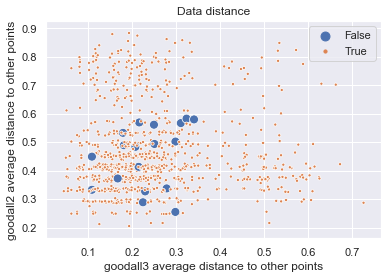

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c6ed977508>)

In [15]:
spatial_analysis.plot_distance_scatterplot('goodall3','goodall2',scatter_sample=1000,distance_sample=0.0001)



### How do the misclassified points look like alone

100%|███████████████████████████████████████████████████████| 150/150 [00:54<00:00,  2.75it/s]


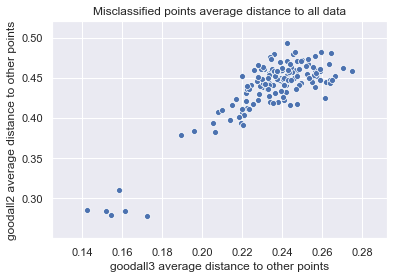

In [16]:
fig,axis,dist1,dist2=spatial_analysis.plot_distance_misclassified('goodall3','goodall2', distance_sample=0.01,scatter_sample=1)

## How does the distribution looks like


Processing correctly classified datapoints in metric  goodall2


100%|███████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s]


Processing misclasfied datapoints in metric  goodall2


100%|███████████████████████████████████████████████████████| 150/150 [02:23<00:00,  1.04it/s]


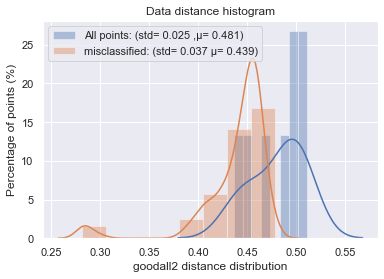

In [17]:
spatial_analysis.plot_avg_distance_histogram("goodall2",histo_sample = 0.001)

##  Let's see them all

Processing correctly classified datapoints in metric  overlap


100%|███████████████████████████████████████████████████████| 500/500 [00:06<00:00, 76.12it/s]


Processing misclasfied datapoints in metric  overlap


100%|███████████████████████████████████████████████████████| 150/150 [01:28<00:00,  1.69it/s]


Processing correctly classified datapoints in metric  goodall2


100%|███████████████████████████████████████████████████████| 500/500 [00:10<00:00, 47.10it/s]


Processing misclasfied datapoints in metric  goodall2


100%|███████████████████████████████████████████████████████| 150/150 [02:25<00:00,  1.03it/s]


Processing correctly classified datapoints in metric  goodall3


100%|███████████████████████████████████████████████████████| 500/500 [00:07<00:00, 65.47it/s]


Processing misclasfied datapoints in metric  goodall3


100%|███████████████████████████████████████████████████████| 150/150 [01:49<00:00,  1.37it/s]


Processing correctly classified datapoints in metric  lin


100%|███████████████████████████████████████████████████████| 500/500 [00:15<00:00, 32.50it/s]


Processing misclasfied datapoints in metric  lin


100%|███████████████████████████████████████████████████████| 150/150 [03:36<00:00,  1.44s/it]


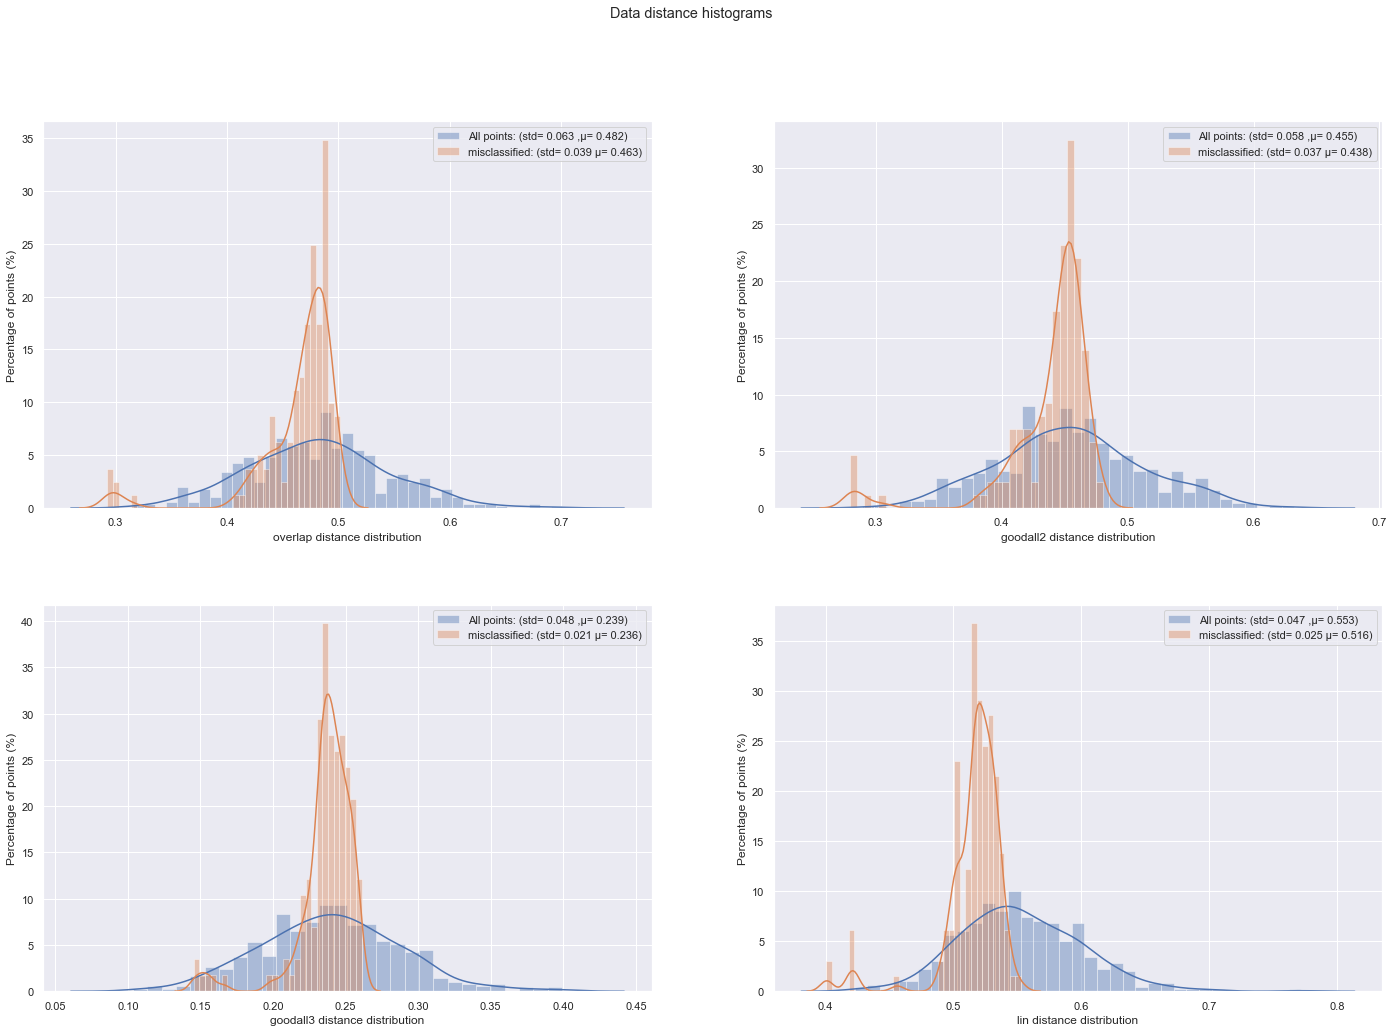

In [19]:
spatial_analysis.plot_full_cat_histogram_report(histo_sample = 2000,distance_sample=0.005,mdistance_sample=0.05,bar_width=0.01)